<a href="https://colab.research.google.com/github/zahedsaifi94/Football-Analytics/blob/main/FCB_2023_2024_Team_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FC BARCELONA DATA LA LIGA 2023/2024**

In [ ]:
## Scrape FBREF for FC Barcelona 2023/2024 season data for all competitions scores
import pandas as pd

df_2324_scores = pd.read_html('https://fbref.com/en/squads/206d90db/2023-2024/matchlogs/all_comps/schedule/Barcelona-Scores-and-Fixtures-All-Competitions', attrs={"id":"matchlogs_for"})[0]

In [ ]:
## Change date column to 2023/2024 season
df_2324_scores['Date'] = "2023/2024"

In [ ]:
## Check the data types
df_2324_scores.dtypes

Date             object
Time             object
Comp             object
Round            object
Day              object
Venue            object
Result           object
GF              float64
GA              float64
Opponent         object
xG              float64
xGA             float64
Poss            float64
Attendance      float64
Captain          object
Formation        object
Referee          object
Match Report     object
Notes            object
dtype: object

In [ ]:
## Check the first five rows of data
df_2324_scores.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2023/2024,21:30,La Liga,Matchweek 1,Sun,Away,D,0.0,0.0,Getafe,1.4,0.6,74.0,13410.0,Marc-André ter Stegen,4-2-3-1,César Soto,Match Report,NaN
1,2023/2024,19:30,La Liga,Matchweek 2,Sun,Home,W,2.0,0.0,Cádiz,3.4,1.1,74.0,39603.0,Marc-André ter Stegen,3-4-3,Alejandro Muñíz,Match Report,NaN
2,2023/2024,17:30,La Liga,Matchweek 3,Sun,Away,W,4.0,3.0,Villarreal,3.1,1.9,60.0,21679.0,Sergi Roberto,4-3-3,Alejandro Hernández,Match Report,NaN
3,2023/2024,21:00,La Liga,Matchweek 4,Sun,Away,W,2.0,1.0,Osasuna,2.0,0.8,69.0,21966.0,Sergi Roberto,4-3-3,Miguel Ángel Ortiz Arias,Match Report,NaN
4,2023/2024,21:00,La Liga,Matchweek 5,Sat,Home,W,5.0,0.0,Betis,2.4,0.8,65.0,45055.0,Marc-André ter Stegen,4-3-3,José Sánchez,Match Report,NaN


In [ ]:
## Only keep the columns I am interested in
df_2324_scores = df_2324_scores[df_2324_scores['Comp'] == 'La Liga']
df_2324_scores = df_2324_scores[["Date","Result","GF","GA","xG","xGA","Poss"]]

In [ ]:
## Drop the rows that have NA
df_2324_scores.dropna(inplace=True)

In [ ]:
## Show the final table
df_2324_scores.head()

,Date,Result,GF,GA,xG,xGA,Poss
0,2023/2024,D,0.0,0.0,1.4,0.6,74.0
1,2023/2024,W,2.0,0.0,3.4,1.1,74.0
2,2023/2024,W,4.0,3.0,3.1,1.9,60.0
3,2023/2024,W,2.0,1.0,2.0,0.8,69.0
4,2023/2024,W,5.0,0.0,2.4,0.8,65.0


In [ ]:
## Scrape FBREF for FC Barcelona 2023/2024 season data for all competitions shooting data
import pandas as pd

df_2324_shooting = pd.read_html('https://fbref.com/en/squads/206d90db/2023-2024/matchlogs/all_comps/shooting/Barcelona-Match-Logs-All-Competitions', attrs={"id":"matchlogs_for"})[0]

In [ ]:
## Drop the first level and make the second level the index
new_headers_shooting = df_2324_shooting.columns.droplevel(0)
df_2324_shooting.columns = new_headers_shooting

In [ ]:
## Only keep the columns I am interested in
df_2324_shooting = df_2324_shooting[df_2324_shooting['Comp'] == 'La Liga']
df_2324_shooting = df_2324_shooting[['Date','Gls', 'Sh', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'Dist', 'FK']]

In [ ]:
## Change date column to 2023/2024 season
df_2324_shooting['Date'] = "2023/2024"

In [ ]:
## Drop the rows that have NA
df_2324_shooting.dropna(inplace=True)

In [ ]:
## Drop the last row which has the total
df_2324_shooting = df_2324_shooting.iloc[:-1].copy()

In [ ]:
df_2324_shooting.head()

,Date,Gls,Sh,SoT,SoT%,G/Sh,G/SoT,Dist,FK
0,2023/2024,0,14,3,21.4,0.00,0.00,19.9,1.0
1,2023/2024,2,24,10,41.7,0.08,0.20,15.5,2.0
2,2023/2024,4,21,11,52.4,0.19,0.36,16.8,0.0
3,2023/2024,2,8,3,37.5,0.13,0.33,15.6,0.0
4,2023/2024,5,17,9,52.9,0.29,0.56,18.7,2.0


In [ ]:
## Scrape FBREF for FC Barcelona 2023/2024 season data for all competitions passing
import pandas as pd

df_2324_passing = pd.read_html('https://fbref.com/en/squads/206d90db/2023-2024/matchlogs/all_comps/passing/Barcelona-Match-Logs-All-Competitions', attrs={"id":"matchlogs_for"})[0]

In [ ]:
## Drop these columns that I don't need
columns_to_drop = ['Short', 'Medium', 'Long']

# Function to check if a column tuple contains any of the labels to drop
def contains_unwanted(col_tuple):
    return any(label in col_tuple for label in columns_to_drop)

# Filter columns (in-place modification)
df_2324_passing.drop(columns=[col for col in df_2324_passing.columns if contains_unwanted(col)],
                     axis=1, inplace=True)

In [ ]:
## Drop the first level and make the second level the index
new_headers_passing = df_2324_passing.columns.droplevel(0)
df_2324_passing.columns = new_headers_passing

In [ ]:
## Change date column to 2023/2024 season
df_2324_passing['Date'] = "2023/2024"

In [ ]:
## Drop the rows that have NA
df_2324_passing.dropna(inplace=True)

In [ ]:
## Only keep the columns I am interested in
df_2324_passing = df_2324_passing[df_2324_passing['Comp'] == 'La Liga']
df_2324_passing = df_2324_passing[['Date','Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Ast', 'xAG','xA', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP']]

In [ ]:
df_2324_passing.head()

,Date,Cmp,Att,Cmp%,TotDist,PrgDist,Ast,xAG,xA,KP,1/3,PPA,CrsPA,PrgP
0,2023/2024,680.0,767.0,88.7,10491.0,3225.0,0,1.3,1.3,11.0,56.0,9.0,1.0,50.0
1,2023/2024,585.0,659.0,88.8,8754.0,2796.0,2,2.5,2.3,17.0,49.0,15.0,6.0,58.0
2,2023/2024,557.0,628.0,88.7,9179.0,2952.0,1,1.6,1.6,14.0,45.0,18.0,1.0,58.0
3,2023/2024,618.0,694.0,89.0,9735.0,2905.0,1,0.3,1.1,5.0,59.0,9.0,1.0,41.0
4,2023/2024,619.0,692.0,89.5,9142.0,2976.0,4,2.2,1.5,14.0,39.0,15.0,6.0,50.0


In [ ]:
## Scrape FBREF for FC Barcelona 2023/2024 season data for all competitions passing type
import pandas as pd

df_2324_passing_type = pd.read_html('https://fbref.com/en/squads/206d90db/2023-2024/matchlogs/all_comps/passing_types/Barcelona-Match-Logs-All-Competitions', attrs={"id":"matchlogs_for"})[0]

In [ ]:
## Drop the first level and make the second level the index
new_headers_passing_type = df_2324_passing_type.columns.droplevel(0)
df_2324_passing_type.columns = new_headers_passing_type

In [ ]:
## Change date column to 2023/2024 season
df_2324_passing_type['Date'] = "2023/2024"

In [ ]:
## Drop the rows that have NA
df_2324_passing_type.dropna(inplace=True)

In [ ]:
## Only keep the columns I am interested in
df_2324_passing_type = df_2324_passing_type[df_2324_passing_type['Comp'] == 'La Liga']
df_2324_passing_type = df_2324_passing_type[['Att', 'Live', 'Dead', 'FK', 'TB', 'Sw', 'Crs', 'TI', 'CK','In', 'Out', 'Str', 'Cmp', 'Off', 'Blocks']]

In [ ]:
df_2324_passing_type.head()

,Att,Live,Dead,FK,TB,Sw,Crs,TI,CK,In,Out,Str,Cmp,Off,Blocks
0,767.0,712.0,53.0,23.0,5.0,5.0,17,17.0,4.0,3.0,0.0,0.0,680.0,2.0,2.0
1,659.0,605.0,53.0,21.0,5.0,2.0,29,14.0,10.0,3.0,4.0,0.0,585.0,1.0,4.0
2,628.0,584.0,41.0,17.0,2.0,7.0,18,12.0,6.0,2.0,1.0,1.0,557.0,3.0,7.0
3,694.0,654.0,38.0,7.0,0.0,3.0,16,21.0,5.0,3.0,1.0,0.0,618.0,2.0,8.0
4,692.0,646.0,43.0,10.0,2.0,2.0,16,14.0,9.0,4.0,0.0,0.0,619.0,3.0,10.0


In [ ]:
## Scrape FBREF for FC Barcelona 2023/2024 season data for all competitions possession
import pandas as pd

df_2324_possession = pd.read_html('https://fbref.com/en/squads/206d90db/2023-2024/matchlogs/all_comps/possession/Barcelona-Match-Logs-All-Competitions', attrs={"id":"matchlogs_for"})[0]

In [ ]:
## Drop the first level and make the second level the index
new_headers_possession = df_2324_possession.columns.droplevel(0)
df_2324_possession.columns = new_headers_possession

In [ ]:
## Change date column to 2023/2024 season
df_2324_possession['Date'] = "2023/2024"

In [ ]:
## Drop the rows that have NA
df_2324_possession.dropna(inplace=True)

In [ ]:
## Only keep the columns I am interested in
df_2324_possession = df_2324_possession[df_2324_possession['Comp'] == 'La Liga']
df_2324_possession = df_2324_possession[['Poss', 'Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd','Att 3rd', 'Att Pen', 'Live', 'Att', 'Succ', 'Succ%', 'Tkld', 'Tkld%','Carries', 'TotDist', 'PrgDist', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis','Rec', 'PrgR']]

In [ ]:
df_2324_possession.head()

,Poss,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Att,Succ,...,Carries,TotDist,PrgDist,PrgC,1/3,CPA,Mis,Dis,Rec,PrgR
0,74.0,856.0,52.0,193.0,471.0,203.0,22.0,856.0,21.0,12.0,...,582.0,3310.0,1980.0,34.0,26.0,5.0,15.0,4.0,670.0,49.0
1,74.0,748.0,38.0,119.0,325.0,311.0,40.0,748.0,19.0,12.0,...,522.0,3058.0,1703.0,40.0,42.0,11.0,16.0,8.0,579.0,58.0
2,60.0,730.0,43.0,157.0,384.0,198.0,37.0,730.0,14.0,11.0,...,478.0,2582.0,1472.0,25.0,22.0,8.0,11.0,13.0,551.0,57.0
3,69.0,818.0,75.0,239.0,358.0,225.0,20.0,817.0,17.0,12.0,...,614.0,2670.0,1554.0,18.0,22.0,6.0,18.0,13.0,615.0,41.0
4,65.0,800.0,59.0,223.0,390.0,193.0,34.0,800.0,31.0,17.0,...,371.0,2437.0,1548.0,31.0,22.0,11.0,10.0,3.0,613.0,50.0


In [ ]:
## Now I have the following tables for analysis

# Scores & Summary
df_2324_scores

# Shooting
df_2324_shooting

# Passing
df_2324_passing
df_2324_passing_type

# Possession
df_2324_possession

,Poss,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Att,Succ,...,Carries,TotDist,PrgDist,PrgC,1/3,CPA,Mis,Dis,Rec,PrgR
0,74.0,856.0,52.0,193.0,471.0,203.0,22.0,856.0,21.0,12.0,...,582.0,3310.0,1980.0,34.0,26.0,5.0,15.0,4.0,670.0,49.0
1,74.0,748.0,38.0,119.0,325.0,311.0,40.0,748.0,19.0,12.0,...,522.0,3058.0,1703.0,40.0,42.0,11.0,16.0,8.0,579.0,58.0
2,60.0,730.0,43.0,157.0,384.0,198.0,37.0,730.0,14.0,11.0,...,478.0,2582.0,1472.0,25.0,22.0,8.0,11.0,13.0,551.0,57.0
3,69.0,818.0,75.0,239.0,358.0,225.0,20.0,817.0,17.0,12.0,...,614.0,2670.0,1554.0,18.0,22.0,6.0,18.0,13.0,615.0,41.0
4,65.0,800.0,59.0,223.0,390.0,193.0,34.0,800.0,31.0,17.0,...,371.0,2437.0,1548.0,31.0,22.0,11.0,10.0,3.0,613.0,50.0
6,74.0,941.0,51.0,150.0,532.0,265.0,12.0,941.0,14.0,7.0,...,690.0,3618.0,2075.0,30.0,26.0,3.0,15.0,6.0,765.0,69.0
7,69.0,734.0,37.0,125.0,429.0,189.0,21.0,734.0,27.0,12.0,...,490.0,2718.0,1628.0,29.0,16.0,2.0,22.0,15.0,513.0,53.0
8,58.0,643.0,61.0,194.0,268.0,186.0,34.0,643.0,28.0,16.0,...,397.0,2348.0,1301.0,21.0,15.0,10.0,17.0,10.0,426.0,49.0
10,80.0,928.0,26.0,133.0,469.0,330.0,33.0,928.0,23.0,13.0,...,581.0,3550.0,2261.0,44.0,39.0,6.0,21.0,10.0,721.0,51.0
11,62.0,682.0,56.0,287.0,297.0,104.0,19.0,682.0,18.0,8.0,...,427.0,1984.0,1145.0,17.0,8.0,6.0,22.0,4.0,482.0,35.0


In [ ]:
## Season Results

df_results = df_2324_scores['Result']

df_results.value_counts()

Result
W    21
D     7
L     4
Name: count, dtype: int64

In [ ]:
## Win Percentage
df_results.value_counts()['W']/len(df_results)

0.65625

In [ ]:
## Loss Percentage
df_results.value_counts()['L']/len(df_results)

0.125

In [ ]:
## Draw Percentage
df_results.value_counts()['D']/len(df_results)

0.21875

In [ ]:
## Total Goals Scored
df_2324_scores['GF'].sum()

## Total Goals Conceded
df_2324_scores['GA'].sum()

## Total Expected Goals
df_2324_scores['xG'].sum()

## Average Possession
df_2324_scores['Poss'].mean()

## Median Possession
df_2324_scores['Poss'].median()

## Average Expected Goals per Match
df_2324_scores['xG'].mean()

## Average Goals Scored per Match
df_2324_scores['GF'].mean()

## Average Goals Conceded per Match
df_2324_scores['GA'].mean()

1.15625

In [ ]:
## Average Shots on Target
df_2324_shooting['SoT'].mean()

## Average % Shots on Target
df_2324_shooting['SoT%'].mean()

## Average Goals per Shots
df_2324_shooting['G/Sh'].mean()

## Average Goals per Shots on Target
df_2324_shooting['G/SoT'].mean()

## Average Distance of Shot Taken (Meters)
df_2324_shooting['Dist'].mean()*0.9144

15.140694193548388

In [ ]:
## Average Completed Passes per Match
df_2324_passing['Cmp'].mean()

## Average Successful Passes Completed per Match
df_2324_passing['Cmp%'].mean()

## Average Assists per Match
df_2324_passing['Ast'].mean()

## Average Expected Assists per Match
df_2324_passing['xAG'].mean()

## Average Key Passes per Game (Passes that lead directly to a shot)
df_2324_passing['KP'].mean()

## Average Passes into Final Third
df_2324_passing['1/3'].mean()

## Passes into Final Third / Completed Passes per Match
df_2324_passing['1/3'].sum()/df_2324_passing['Cmp'].sum()

## Average Passes into Penalty Area
df_2324_passing['PPA'].mean()

## Progressive Passes / Completed Passes per Match
df_2324_passing['PrgP'].sum()/df_2324_passing['Cmp'].sum()

## Key Passes / Passes into Final Third
df_2324_passing['KP'].sum()/df_2324_passing['1/3'].sum()

0.2708628005657709

In [ ]:
## Touches in Mid 3rd / Total Touches
df_2324_possession['Mid 3rd'].sum()/df_2324_possession['Touches'].sum()

## Touches in Attacking 3rd / Total Touches
df_2324_possession['Att 3rd'].sum()/df_2324_possession['Touches'].sum()

## Touches in Attacking Penalty Area / Total Touches
df_2324_possession['Att Pen'].sum()/df_2324_possession['Touches'].sum()

## Average Take-Ons Attempted per Match
df_2324_possession['Att'].mean()

## Average Successful Take-Ons per Match
df_2324_possession['Succ'].mean()

## Average Succesful Take-Ons Percentage
df_2324_possession['Succ%'].mean()

## Progressive Carries / Total Carries
df_2324_possession['PrgC'].sum()/df_2324_possession['Carries'].sum()

## Carries into Final Third / Progressive Carries
df_2324_possession['1/3'].sum()/df_2324_possession['PrgC'].sum()

## Carries into Penalty Area / Progressive Carries
df_2324_possession['CPA'].sum()/df_2324_possession['PrgC'].sum()


0.25180722891566265

In [ ]:
def calculate_team_stats(df_results, df_2324_scores, df_2324_shooting,
                         df_2324_passing, df_2324_possession):
    """
    Calculates a variety of team statistics from provided DataFrames.

    Args:
        df_results: DataFrame containing win/loss/draw results
        df_2324_scores: DataFrame containing goals and expected goals
        df_2324_shooting: DataFrame containing shooting statistics
        df_2324_passing: DataFrame containing passing statistics
        df_2324_possession: DataFrame containing possession statistics

    Returns:
        dict: A dictionary containing the calculated team statistics.
    """

    stats = {}

    # Win/Loss/Draw
    stats['win_pct'] = df_results.value_counts()['W']/len(df_results)
    stats['loss_pct'] = df_results.value_counts()['L']/len(df_results)
    stats['draw_pct'] = df_results.value_counts()['D']/len(df_results)

    # Goals
    stats['total_goals_scored'] = df_2324_scores['GF'].sum()
    stats['total_goals_conceded'] = df_2324_scores['GA'].sum()
    stats['total_expected_goals'] = df_2324_scores['xG'].sum()

    # Possession
    stats['avg_possession'] = df_2324_scores['Poss'].mean()

    # Expected Goals & Goals per Match
    stats['avg_expected_goals_per_match'] = df_2324_scores['xG'].mean()
    stats['avg_goals_scored_per_match'] = df_2324_scores['GF'].mean()
    stats['avg_goals_conceded_per_match'] = df_2324_scores['GA'].mean()

    # Shooting
    stats['avg_shots_on_target'] = df_2324_shooting['SoT'].mean()
    stats['avg_pct_shots_on_target'] = df_2324_shooting['SoT%'].mean()
    stats['avg_goals_per_shots'] = df_2324_shooting['G/Sh'].mean()
    stats['avg_goals_per_shots_on_target'] = df_2324_shooting['G/SoT'].mean()
    stats['avg_shot_distance_meters'] = df_2324_shooting['Dist'].mean() * 0.9144

    # Passing
    stats['avg_completed_passes_per_match'] = df_2324_passing['Cmp'].mean()
    stats['avg_successful_passes_pct'] = df_2324_passing['Cmp%'].mean()
    stats['avg_assists_per_match'] = df_2324_passing['Ast'].mean()
    stats['avg_expected_assists_per_match'] = df_2324_passing['xAG'].mean()
    stats['avg_key_passes_per_match'] = df_2324_passing['KP'].mean()
    stats['final_third_pass_pct'] = df_2324_passing['1/3'].sum() / df_2324_passing['Cmp'].sum()
    stats['avg_passes_into_penalty_area'] = df_2324_passing['PPA'].mean()
    stats['progressive_pass_pct'] = df_2324_passing['PrgP'].sum() / df_2324_passing['Cmp'].sum()
    stats['key_pass_final_third'] = df_2324_passing['KP'].sum()/df_2324_passing['1/3'].sum()

    # Possession
    stats['touches_mid_third_pct'] = df_2324_possession['Mid 3rd'].sum() / df_2324_possession['Touches'].sum()
    stats['touches_att_third_pct'] = df_2324_possession['Att 3rd'].sum() / df_2324_possession['Touches'].sum()
    stats['touches_penalty_area_pct'] = df_2324_possession['Att Pen'].sum() / df_2324_possession['Touches'].sum()
    stats['touches_penalty_area_compared_to_att_third'] = df_2324_possession['Att Pen'].sum() / df_2324_possession['Att 3rd'].sum()


    # Take-Ons
    stats['avg_takeons_attempted'] = df_2324_possession['Att'].mean()
    stats['avg_successful_takeons'] = df_2324_possession['Succ'].mean()
    stats['avg_successful_takeons_pct'] = df_2324_possession['Succ%'].mean()

    # Carries
    stats['progressive_carries_pct'] = df_2324_possession['PrgC'].sum() / df_2324_possession['Carries'].sum()
    stats['final_third_carries_pct'] = df_2324_possession['1/3'].sum() / df_2324_possession['PrgC'].sum()
    stats['penalty_area_carries_pct'] = df_2324_possession['CPA'].sum() / df_2324_possession['PrgC'].sum()

    return stats

# -------- Example Usage --------
# (You'll need to load your DataFrames: df_results, df_2324_scores, etc.)

team_statistics = calculate_team_stats(df_results, df_2324_scores, df_2324_shooting,
                                       df_2324_passing, df_2324_possession)

print(team_statistics)


{'win_pct': 0.65625, 'loss_pct': 0.125, 'draw_pct': 0.21875, 'total_goals_scored': 64.0, 'total_goals_conceded': 37.0, 'total_expected_goals': 66.5, 'avg_possession': 64.0625, 'avg_expected_goals_per_match': 2.078125, 'avg_goals_scored_per_match': 2.0, 'avg_goals_conceded_per_match': 1.15625, 'avg_shots_on_target': 5.516129032258065, 'avg_pct_shots_on_target': 35.651612903225804, 'avg_goals_per_shots': 0.12548387096774194, 'avg_goals_per_shots_on_target': 0.34354838709677415, 'avg_shot_distance_meters': 15.140694193548388, 'avg_completed_passes_per_match': 557.96875, 'avg_successful_passes_pct': 86.315625, 'avg_assists_per_match': 1.375, 'avg_expected_assists_per_match': 1.5875000000000001, 'avg_key_passes_per_match': 11.96875, 'final_third_pass_pct': 0.07919350322038644, 'avg_passes_into_penalty_area': 10.90625, 'progressive_pass_pct': 0.0887706524782974, 'key_pass_final_third': 0.2708628005657709, 'touches_mid_third_pct': 0.49002244948865054, 'touches_att_third_pct': 0.25488484243784

In [ ]:
stats_df_fcb = pd.DataFrame(team_statistics, index=[0])
stats_df_fcb

,win_pct,loss_pct,draw_pct,total_goals_scored,total_goals_conceded,total_expected_goals,avg_possession,avg_expected_goals_per_match,avg_goals_scored_per_match,avg_goals_conceded_per_match,...,touches_mid_third_pct,touches_att_third_pct,touches_penalty_area_pct,touches_penalty_area_compared_to_att_third,avg_takeons_attempted,avg_successful_takeons,avg_successful_takeons_pct,progressive_carries_pct,final_third_carries_pct,penalty_area_carries_pct
0,0.65625,0.125,0.21875,64.0,37.0,66.5,64.0625,2.078125,2.0,1.15625,...,0.490022,0.254885,0.037291,0.146306,22.09375,10.25,46.103125,0.056344,0.738554,0.251807


# **REAL MADRID DATA 2023/2024**

In [ ]:
## Scrape FBREF for RMA 2023/2024 season data for all competitions scores
import pandas as pd

df_2324_scores_rma = pd.read_html('https://fbref.com/en/squads/53a2f082/2023-2024/all_comps/Real-Madrid-Stats-All-Competitions', attrs={"id":"matchlogs_for"})[0]

In [ ]:
## Change date column to 2023/2024 season
df_2324_scores_rma['Date'] = "2023/2024"

In [ ]:
## Remove the row that has extra time data
df_2324_scores_rma.loc[44, ['GF', 'GA']] = 1

In [ ]:
df_2324_scores_rma[['GF', 'GA']] = df_2324_scores_rma[['GF', 'GA']].apply(pd.to_numeric, errors='coerce')

In [ ]:
## Check the first five rows of data
df_2324_scores_rma.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2023/2024,21:30,La Liga,Matchweek 1,Sat,Away,W,2.0,0.0,Athletic Club,0.9,0.4,54.0,48927.0,Dani Carvajal,4-1-2-1-2◆,Jesús Gil,Match Report,NaN
1,2023/2024,19:30,La Liga,Matchweek 2,Sat,Away,W,3.0,1.0,Almería,2.0,1.3,57.0,17561.0,Dani Carvajal,4-3-1-2,José Sánchez,Match Report,NaN
2,2023/2024,21:30,La Liga,Matchweek 3,Fri,Away,W,1.0,0.0,Celta Vigo,1.4,1.2,63.0,23057.0,Dani Carvajal,4-1-2-1-2◆,Isidro Díaz de Mera,Match Report,NaN
3,2023/2024,16:15,La Liga,Matchweek 4,Sat,Home,W,2.0,1.0,Getafe,2.8,0.4,76.0,66747.0,Luka Modrić,4-3-1-2,Mario Melero,Match Report,NaN
4,2023/2024,21:00,La Liga,Matchweek 5,Sun,Home,W,2.0,1.0,Real Sociedad,2.0,1.6,52.0,70092.0,Dani Carvajal,4-1-2-1-2◆,César Soto,Match Report,NaN


In [ ]:
## Only keep the columns I am interested in
df_2324_scores_rma = df_2324_scores_rma[df_2324_scores_rma['Comp'] == 'La Liga']
df_2324_scores_rma = df_2324_scores_rma[["Date","Result","GF","GA","xG","xGA","Poss"]]

In [ ]:
## Drop the rows that have NA
df_2324_scores_rma.dropna(inplace=True)

In [ ]:
## Show the final table
df_2324_scores_rma.head()

,Date,Result,GF,GA,xG,xGA,Poss
0,2023/2024,W,2.0,0.0,0.9,0.4,54.0
1,2023/2024,W,3.0,1.0,2.0,1.3,57.0
2,2023/2024,W,1.0,0.0,1.4,1.2,63.0
3,2023/2024,W,2.0,1.0,2.8,0.4,76.0
4,2023/2024,W,2.0,1.0,2.0,1.6,52.0


In [ ]:
## Scrape FBREF for RMA 2023/2024 season data for all competitions shooting data
import pandas as pd

df_2324_shooting_rma = pd.read_html('https://fbref.com/en/squads/53a2f082/2023-2024/matchlogs/all_comps/shooting/Real-Madrid-Match-Logs-All-Competitions', attrs={"id":"matchlogs_for"})[0]

In [ ]:
## Drop the first level and make the second level the index
new_headers_shooting_rma = df_2324_shooting_rma.columns.droplevel(0)
df_2324_shooting_rma.columns = new_headers_shooting_rma

In [ ]:
## Only keep the columns I am interested in
df_2324_shooting_rma = df_2324_shooting_rma[df_2324_shooting_rma['Comp'] == 'La Liga']
df_2324_shooting_rma = df_2324_shooting_rma[['Date','Gls', 'Sh', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'Dist', 'FK']]

In [ ]:
## Change date column to 2023/2024 season
df_2324_shooting_rma['Date'] = "2023/2024"

In [ ]:
## Drop the rows that have NA
df_2324_shooting_rma.dropna(inplace=True)

In [ ]:
## Drop the last row which has the total
df_2324_shooting_rma = df_2324_shooting_rma.iloc[:-1].copy()

In [ ]:
df_2324_shooting_rma.head()

,Date,Gls,Sh,SoT,SoT%,G/Sh,G/SoT,Dist,FK
0,2023/2024,2,14,8,57.1,0.14,0.25,16.0,2.0
1,2023/2024,3,25,9,36.0,0.12,0.33,17.0,1.0
2,2023/2024,1,9,2,22.2,0.11,0.50,19.4,0.0
3,2023/2024,2,26,12,46.2,0.08,0.17,17.7,0.0
4,2023/2024,2,17,8,47.1,0.12,0.25,15.9,1.0


In [ ]:
## Scrape FBREF for RMA 2023/2024 season data for all competitions passing
import pandas as pd

df_2324_passing_rma = pd.read_html('https://fbref.com/en/squads/53a2f082/2023-2024/matchlogs/all_comps/passing/Real-Madrid-Match-Logs-All-Competitions', attrs={"id":"matchlogs_for"})[0]

In [ ]:
## Drop these columns that I don't need
columns_to_drop = ['Short', 'Medium', 'Long']

# Function to check if a column tuple contains any of the labels to drop
def contains_unwanted(col_tuple):
    return any(label in col_tuple for label in columns_to_drop)

# Filter columns (in-place modification)
df_2324_passing_rma.drop(columns=[col for col in df_2324_passing_rma.columns if contains_unwanted(col)],
                     axis=1, inplace=True)

In [ ]:
## Drop the first level and make the second level the index
new_headers_passing_rma = df_2324_passing_rma.columns.droplevel(0)
df_2324_passing_rma.columns = new_headers_passing_rma

In [ ]:
## Change date column to 2023/2024 season
df_2324_passing_rma['Date'] = "2023/2024"

In [ ]:
## Drop the rows that have NA
df_2324_passing_rma.dropna(inplace=True)

In [ ]:
## Only keep the columns I am interested in
df_2324_passing_rma = df_2324_passing_rma[df_2324_passing_rma['Comp'] == 'La Liga']
df_2324_passing_rma = df_2324_passing_rma[['Date','Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Ast', 'xAG','xA', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP']]

In [ ]:
df_2324_passing_rma.head()

,Date,Cmp,Att,Cmp%,TotDist,PrgDist,Ast,xAG,xA,KP,1/3,PPA,CrsPA,PrgP
0,2023/2024,556.0,639.0,87.0,9202.0,3152.0,2,0.7,0.9,9.0,37.0,11.0,1.0,49.0
1,2023/2024,548.0,622.0,88.1,8095.0,2774.0,2,1.8,1.5,22.0,50.0,15.0,4.0,55.0
2,2023/2024,589.0,672.0,87.6,8987.0,2775.0,1,0.5,1.2,7.0,51.0,4.0,1.0,42.0
3,2023/2024,674.0,782.0,86.2,10902.0,3599.0,0,1.5,2.1,22.0,61.0,23.0,3.0,85.0
4,2023/2024,477.0,558.0,85.5,8588.0,2754.0,2,1.7,1.9,12.0,47.0,11.0,3.0,46.0


In [ ]:
## Scrape FBREF for RMA 2023/2024 season data for all competitions passing type
import pandas as pd

df_2324_passing_type_rma = pd.read_html('https://fbref.com/en/squads/53a2f082/2023-2024/matchlogs/all_comps/passing_types/Real-Madrid-Match-Logs-All-Competitions', attrs={"id":"matchlogs_for"})[0]

In [ ]:
## Drop the first level and make the second level the index
new_headers_passing_type_rma = df_2324_passing_type_rma.columns.droplevel(0)
df_2324_passing_type_rma.columns = new_headers_passing_type_rma

In [ ]:
## Change date column to 2023/2024 season
df_2324_passing_type_rma['Date'] = "2023/2024"

In [ ]:
## Drop the rows that have NA
df_2324_passing_type_rma.dropna(inplace=True)

In [ ]:
## Only keep the columns I am interested in
df_2324_passing_type_rma = df_2324_passing_type_rma[df_2324_passing_type_rma['Comp'] == 'La Liga']
df_2324_passing_type_rma = df_2324_passing_type_rma[['Att', 'Live', 'Dead', 'FK', 'TB', 'Sw', 'Crs', 'TI', 'CK','In', 'Out', 'Str', 'Cmp', 'Off', 'Blocks']]

In [ ]:
df_2324_passing_type_rma.head()

,Att,Live,Dead,FK,TB,Sw,Crs,TI,CK,In,Out,Str,Cmp,Off,Blocks
0,639.0,585.0,52.0,19.0,5.0,6.0,9,15.0,5.0,2.0,2.0,0.0,556.0,2.0,6.0
1,622.0,572.0,46.0,10.0,1.0,5.0,26,19.0,5.0,0.0,5.0,0.0,548.0,4.0,7.0
2,672.0,622.0,47.0,17.0,1.0,5.0,17,12.0,5.0,0.0,4.0,0.0,589.0,3.0,5.0
3,782.0,727.0,53.0,16.0,4.0,7.0,29,20.0,11.0,1.0,5.0,0.0,674.0,2.0,11.0
4,558.0,507.0,48.0,14.0,0.0,6.0,19,20.0,4.0,0.0,2.0,0.0,477.0,3.0,4.0


In [ ]:
## Scrape FBREF for RMA 2023/2024 season data for all competitions possession
import pandas as pd

df_2324_possession_rma = pd.read_html('https://fbref.com/en/squads/53a2f082/2023-2024/matchlogs/all_comps/possession/Real-Madrid-Match-Logs-All-Competitions', attrs={"id":"matchlogs_for"})[0]

In [ ]:
## Drop the first level and make the second level the index
new_headers_possession = df_2324_possession_rma.columns.droplevel(0)
df_2324_possession_rma.columns = new_headers_possession

In [ ]:
## Change date column to 2023/2024 season
df_2324_possession_rma['Date'] = "2023/2024"

In [ ]:
## Drop the rows that have NA
df_2324_possession_rma.dropna(inplace=True)

In [ ]:
## Only keep the columns I am interested in
df_2324_possession_rma = df_2324_possession_rma[df_2324_possession_rma['Comp'] == 'La Liga']
df_2324_possession_rma = df_2324_possession_rma[['Poss', 'Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd','Att 3rd', 'Att Pen', 'Live', 'Att', 'Succ', 'Succ%', 'Tkld', 'Tkld%','Carries', 'TotDist', 'PrgDist', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis','Rec', 'PrgR']]

In [ ]:
df_2324_possession_rma.head()

,Poss,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Att,Succ,...,Carries,TotDist,PrgDist,PrgC,1/3,CPA,Mis,Dis,Rec,PrgR
0,54.0,770.0,91.0,273.0,352.0,154.0,24.0,770.0,19.0,8.0,...,528.0,2588.0,1342.0,21.0,17.0,4.0,19.0,6.0,551.0,48.0
1,57.0,736.0,71.0,173.0,323.0,252.0,43.0,736.0,24.0,12.0,...,477.0,2771.0,1638.0,32.0,38.0,13.0,9.0,6.0,546.0,55.0
2,63.0,775.0,73.0,172.0,436.0,178.0,24.0,774.0,25.0,15.0,...,590.0,2958.0,1519.0,28.0,17.0,8.0,20.0,9.0,583.0,42.0
3,76.0,880.0,46.0,178.0,413.0,295.0,52.0,880.0,17.0,8.0,...,644.0,3563.0,1861.0,31.0,30.0,9.0,12.0,7.0,668.0,84.0
4,52.0,667.0,60.0,204.0,299.0,168.0,31.0,667.0,24.0,8.0,...,484.0,2558.0,1180.0,27.0,12.0,8.0,7.0,3.0,475.0,46.0


In [ ]:
## Now I have the following tables for analysis

# Scores & Summary
df_2324_scores_rma

# Shooting
df_2324_shooting_rma

# Passing
df_2324_passing_rma
df_2324_passing_type_rma

# Possession
df_2324_possession_rma

,Poss,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Att,Succ,...,Carries,TotDist,PrgDist,PrgC,1/3,CPA,Mis,Dis,Rec,PrgR
0,54.0,770.0,91.0,273.0,352.0,154.0,24.0,770.0,19.0,8.0,...,528.0,2588.0,1342.0,21.0,17.0,4.0,19.0,6.0,551.0,48.0
1,57.0,736.0,71.0,173.0,323.0,252.0,43.0,736.0,24.0,12.0,...,477.0,2771.0,1638.0,32.0,38.0,13.0,9.0,6.0,546.0,55.0
2,63.0,775.0,73.0,172.0,436.0,178.0,24.0,774.0,25.0,15.0,...,590.0,2958.0,1519.0,28.0,17.0,8.0,20.0,9.0,583.0,42.0
3,76.0,880.0,46.0,178.0,413.0,295.0,52.0,880.0,17.0,8.0,...,644.0,3563.0,1861.0,31.0,30.0,9.0,12.0,7.0,668.0,84.0
4,52.0,667.0,60.0,204.0,299.0,168.0,31.0,667.0,24.0,8.0,...,484.0,2558.0,1180.0,27.0,12.0,8.0,7.0,3.0,475.0,46.0
6,63.0,770.0,50.0,143.0,332.0,305.0,34.0,770.0,28.0,11.0,...,491.0,2510.0,1397.0,22.0,35.0,4.0,17.0,13.0,575.0,73.0
7,48.0,723.0,51.0,178.0,316.0,235.0,51.0,723.0,25.0,10.0,...,500.0,2841.0,1686.0,31.0,16.0,14.0,13.0,10.0,527.0,47.0
8,48.0,675.0,103.0,261.0,297.0,126.0,25.0,675.0,25.0,13.0,...,503.0,2488.0,1382.0,30.0,20.0,12.0,18.0,8.0,483.0,29.0
10,67.0,846.0,72.0,209.0,445.0,199.0,40.0,845.0,18.0,8.0,...,608.0,2987.0,1573.0,21.0,20.0,11.0,18.0,5.0,672.0,57.0
11,51.0,634.0,106.0,281.0,249.0,107.0,17.0,634.0,15.0,3.0,...,421.0,2018.0,1069.0,16.0,13.0,7.0,12.0,7.0,462.0,30.0


In [ ]:
## Season Results

df_result_rma = df_2324_scores_rma['Result']

df_result_rma.value_counts()

Result
W    25
D     6
L     1
Name: count, dtype: int64

In [ ]:
## Win Percentage
df_result_rma.value_counts()['W']/len(df_result_rma)

0.78125

In [ ]:
## Loss Percentage
df_result_rma.value_counts()['L']/len(df_result_rma)

0.03125

In [ ]:
## Draw Percentage
df_result_rma.value_counts()['D']/len(df_result_rma)

0.1875

In [ ]:
## Total Goals Scored
df_2324_scores_rma['GF'].sum()

## Total Goals Conceded
df_2324_scores_rma['GA'].sum()

## Total Expected Goals
df_2324_scores_rma['xG'].sum()

## Average Possession
df_2324_scores_rma['Poss'].mean()

## Median Possession
df_2324_scores_rma['Poss'].median()

## Average Expected Goals per Match
df_2324_scores_rma['xG'].mean()

## Average Goals Scored per Match
df_2324_scores_rma['GF'].mean()

## Average Goals Conceded per Match
df_2324_scores_rma['GA'].mean()

0.6875

In [ ]:
## Average Shots on Target
df_2324_shooting_rma['SoT'].mean()

## Average % Shots on Target
df_2324_shooting_rma['SoT%'].mean()

## Average Goals per Shots
df_2324_shooting_rma['G/Sh'].mean()

## Average Goals per Shots on Target
df_2324_shooting_rma['G/SoT'].mean()

## Average Distance of Shot Taken (Meters)
df_2324_shooting_rma['Dist'].mean()*0.9144

15.98430193548387

In [ ]:
## Average Completed Passes per Match
df_2324_passing_rma['Cmp'].mean()

## Average Successful Passes Completed per Match
df_2324_passing_rma['Cmp%'].mean()

## Average Assists per Match
df_2324_passing_rma['Ast'].mean()

## Average Expected Assists per Match
df_2324_passing_rma['xAG'].mean()

## Average Key Passes per Game (Passes that lead directly to a shot)
df_2324_passing_rma['KP'].mean()

## Average Passes into Final Third
df_2324_passing_rma['1/3'].mean()

## Passes into Final Third / Completed Passes per Match
df_2324_passing_rma['1/3'].sum()/df_2324_passing_rma['Cmp'].sum()

## Average Passes into Penalty Area
df_2324_passing_rma['PPA'].mean()

## Progressive Passes / Completed Passes per Match
df_2324_passing_rma['PrgP'].sum()/df_2324_passing_rma['Cmp'].sum()


0.09119479517009428

In [ ]:
## Touches in Mid 3rd / Total Touches
df_2324_possession_rma['Mid 3rd'].sum()/df_2324_possession_rma['Touches'].sum()

## Touches in Attacking 3rd / Total Touches
df_2324_possession_rma['Att 3rd'].sum()/df_2324_possession_rma['Touches'].sum()

## Touches in Attacking Penalty Area / Total Touches
df_2324_possession_rma['Att Pen'].sum()/df_2324_possession_rma['Touches'].sum()

## Average Take-Ons Attempted per Match
df_2324_possession_rma['Att'].mean()

## Average Successful Take-Ons per Match
df_2324_possession_rma['Succ'].mean()

## Average Succesful Take-Ons Percentage
df_2324_possession_rma['Succ%'].mean()

## Progressive Carries / Total Carries
df_2324_possession_rma['PrgC'].sum()/df_2324_possession_rma['Carries'].sum()

## Carries into Final Third / Progressive Carries
df_2324_possession_rma['1/3'].sum()/df_2324_possession_rma['PrgC'].sum()

## Carries into Penalty Area / Progressive Carries
df_2324_possession_rma['CPA'].sum()/df_2324_possession_rma['PrgC'].sum()

0.3296296296296296

In [ ]:
def calculate_rma_stats(df_result_rma, df_2324_scores_rma, df_2324_shooting_rma,
                         df_2324_passing_rma, df_2324_possession_rma):
    stats_rma = {}

    # Win/Loss/Draw
    stats_rma['win_pct'] = df_result_rma.value_counts()['W']/len(df_result_rma)
    stats_rma['loss_pct'] = df_result_rma.value_counts()['L']/len(df_result_rma)
    stats_rma['draw_pct'] = df_result_rma.value_counts()['D']/len(df_result_rma)

    # Goals
    stats_rma['total_goals_scored'] = df_2324_scores_rma['GF'].sum()
    stats_rma['total_goals_conceded'] = df_2324_scores_rma['GA'].sum()
    stats_rma['total_expected_goals'] = df_2324_scores_rma['xG'].sum()

    # Possession
    stats_rma['avg_possession'] = df_2324_scores_rma['Poss'].mean()

    # Expected Goals & Goals per Match
    stats_rma['avg_expected_goals_per_match'] = df_2324_scores_rma['xG'].mean()
    stats_rma['avg_goals_scored_per_match'] = df_2324_scores_rma['GF'].mean()
    stats_rma['avg_goals_conceded_per_match'] = df_2324_scores_rma['GA'].mean()

    # Shooting
    stats_rma['avg_shots_on_target'] = df_2324_shooting_rma['SoT'].mean()
    stats_rma['avg_pct_shots_on_target'] = df_2324_shooting_rma['SoT%'].mean()
    stats_rma['avg_goals_per_shots'] = df_2324_shooting_rma['G/Sh'].mean()
    stats_rma['avg_goals_per_shots_on_target'] = df_2324_shooting_rma['G/SoT'].mean()
    stats_rma['avg_shot_distance_meters'] = df_2324_shooting_rma['Dist'].mean() * 0.9144

    # Passing
    stats_rma['avg_completed_passes_per_match'] = df_2324_passing_rma['Cmp'].mean()
    stats_rma['avg_successful_passes_pct'] = df_2324_passing_rma['Cmp%'].mean()
    stats_rma['avg_assists_per_match'] = df_2324_passing_rma['Ast'].mean()
    stats_rma['avg_expected_assists_per_match'] = df_2324_passing_rma['xAG'].mean()
    stats_rma['avg_key_passes_per_match'] = df_2324_passing_rma['KP'].mean()
    stats_rma['final_third_pass_pct'] = df_2324_passing_rma['1/3'].sum() / df_2324_passing_rma['Cmp'].sum()
    stats_rma['avg_passes_into_penalty_area'] = df_2324_passing_rma['PPA'].mean()
    stats_rma['progressive_pass_pct'] = df_2324_passing_rma['PrgP'].sum() / df_2324_passing_rma['Cmp'].sum()
    stats_rma['key_pass_final_third'] = df_2324_passing_rma['KP'].sum()/df_2324_passing_rma['1/3'].sum()

    # Possession
    stats_rma['touches_mid_third_pct'] = df_2324_possession_rma['Mid 3rd'].sum() / df_2324_possession_rma['Touches'].sum()
    stats_rma['touches_att_third_pct'] = df_2324_possession_rma['Att 3rd'].sum() / df_2324_possession_rma['Touches'].sum()
    stats_rma['touches_penalty_area_pct'] = df_2324_possession_rma['Att Pen'].sum() / df_2324_possession_rma['Touches'].sum()
    stats_rma['touches_penalty_area_compared_to_att_third'] = df_2324_possession_rma['Att Pen'].sum() / df_2324_possession_rma['Att 3rd'].sum()

    # Take-Ons
    stats_rma['avg_takeons_attempted'] = df_2324_possession_rma['Att'].mean()
    stats_rma['avg_successful_takeons'] = df_2324_possession_rma['Succ'].mean()
    stats_rma['avg_successful_takeons_pct'] = df_2324_possession_rma['Succ%'].mean()

    # Carries
    stats_rma['progressive_carries_pct'] = df_2324_possession_rma['PrgC'].sum() / df_2324_possession_rma['Carries'].sum()
    stats_rma['final_third_carries_pct'] = df_2324_possession_rma['1/3'].sum() / df_2324_possession_rma['PrgC'].sum()
    stats_rma['penalty_area_carries_pct'] = df_2324_possession_rma['CPA'].sum() / df_2324_possession_rma['PrgC'].sum()

    return stats_rma

team_statistics_rma = calculate_rma_stats(df_result_rma, df_2324_scores_rma, df_2324_shooting_rma,
                         df_2324_passing_rma, df_2324_possession_rma)

print(team_statistics_rma)


{'win_pct': 0.78125, 'loss_pct': 0.03125, 'draw_pct': 0.1875, 'total_goals_scored': 70.0, 'total_goals_conceded': 22.0, 'total_expected_goals': 60.0, 'avg_possession': 59.1875, 'avg_expected_goals_per_match': 1.875, 'avg_goals_scored_per_match': 2.1875, 'avg_goals_conceded_per_match': 0.6875, 'avg_shots_on_target': 6.290322580645161, 'avg_pct_shots_on_target': 39.07096774193549, 'avg_goals_per_shots': 0.13483870967741934, 'avg_goals_per_shots_on_target': 0.347741935483871, 'avg_shot_distance_meters': 15.98430193548387, 'avg_completed_passes_per_match': 566.78125, 'avg_successful_passes_pct': 87.971875, 'avg_assists_per_match': 1.59375, 'avg_expected_assists_per_match': 1.425, 'avg_key_passes_per_match': 12.8125, 'final_third_pass_pct': 0.0802227490764735, 'avg_passes_into_penalty_area': 10.5, 'progressive_pass_pct': 0.09119479517009428, 'key_pass_final_third': 0.281786941580756, 'touches_mid_third_pct': 0.46546183062732166, 'touches_att_third_pct': 0.27405150465378353, 'touches_penalty

In [ ]:
stats_df_rma = pd.DataFrame(team_statistics_rma, index=[0])
stats_df_rma

,win_pct,loss_pct,draw_pct,total_goals_scored,total_goals_conceded,total_expected_goals,avg_possession,avg_expected_goals_per_match,avg_goals_scored_per_match,avg_goals_conceded_per_match,...,touches_mid_third_pct,touches_att_third_pct,touches_penalty_area_pct,touches_penalty_area_compared_to_att_third,avg_takeons_attempted,avg_successful_takeons,avg_successful_takeons_pct,progressive_carries_pct,final_third_carries_pct,penalty_area_carries_pct
0,0.78125,0.03125,0.1875,70.0,22.0,60.0,59.1875,1.875,2.1875,0.6875,...,0.465462,0.274052,0.040903,0.149254,23.65625,10.625,44.33125,0.052356,0.838272,0.32963


# **COMPARING THE TWO TEAMS**

In [ ]:
combined_df = pd.DataFrame([stats_df_fcb.iloc[0], stats_df_rma.iloc[0]])
combined_df.index = ['FC Barcelona', 'Real Madrid']

In [ ]:
combined_df = combined_df.T

In [ ]:
## FC Barcelona Pie Chart
import plotly.graph_objects as go

# Data extraction (this part remains the same)
fc_barcelona_data = combined_df["FC Barcelona"][["win_pct","loss_pct","draw_pct"]]
labels = ['Wins', 'Losses', 'Draws']
sizes = fc_barcelona_data.to_list()

# Create the Pie Chart with Plotly
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=0.4)]) # hole creates a donut-like effect

# Customization
fig.update_traces(textposition='inside', textinfo='percent',
                  marker=dict(colors= ['green', 'red', 'orange'],
                              line=dict(color='#000000', width=1)))
fig.update_layout(title_text="FC Barcelona 2023/2024 La Liga Statistics", title_x=0.5, title_y=0.95, legend = dict(x=0.7, y=0.5), font_family="Roboto")

fig.show()

In [ ]:
## Real Madrid Pie Chart
import plotly.graph_objects as go

# Data extraction (this part remains the same)
real_madrid_data = combined_df["Real Madrid"][["win_pct","loss_pct","draw_pct"]]
labels = ['Wins', 'Losses', 'Draws']
sizes = real_madrid_data.to_list()

# Create the Pie Chart with Plotly
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=0.4)]) # hole creates a donut-like effect

# Customization
fig.update_traces(textposition='inside', textinfo='percent',
                  marker=dict(colors= ['green', 'red', 'orange'],
                              line=dict(color='#000000', width=1)))
fig.update_layout(title_text="Real Madrid 2023/2024 La Liga Statistics", title_x=0.5, title_y=0.95, legend = dict(x=0.7, y=0.5), font_family="Roboto")

fig.show()

In [ ]:
## FC Barcelona Goals vs Expected Goals Bar Chart

import plotly.graph_objects as go

# Assuming combined_df is your DataFrame
fc_barcelona_data = combined_df['FC Barcelona'][["total_goals_scored", "total_expected_goals"]]

# Creating the bar chart
fig = go.Figure(data=[
    go.Bar(name='Total Goals Scored', x=['Total Goals Scored'], y=[fc_barcelona_data['total_goals_scored']],
           marker=dict(color='green'), text=fc_barcelona_data['total_goals_scored'], textposition='auto'),
    go.Bar(name='Total Expected Goals', x=['Total Expected Goals'], y=[fc_barcelona_data['total_expected_goals']],
           marker=dict(color='orange'), text=fc_barcelona_data['total_expected_goals'], textposition='auto')
])

# Customizing layout
fig.update_layout(
    title='FC Barcelona 2023/2024 La Liga Goals vs Expected Goals',
    title_x=0.43,  # Place title in the middle
    yaxis_title='Goals',
    width=800,  # Adjust width
    height=500,  # Adjust height
    font_family="Roboto",
    plot_bgcolor='rgba(0,0,0,0)'
)

# Showing the plot
fig.show()

In [ ]:
## Real Madrid Goals vs Expected Goals Bar Chart

import plotly.graph_objects as go

# Assuming combined_df is your DataFrame
real_madrid_data = combined_df['Real Madrid'][["total_goals_scored", "total_expected_goals"]]

# Creating the bar chart
fig = go.Figure(data=[
    go.Bar(name='Total Goals Scored', x=['Total Goals Scored'], y=[real_madrid_data['total_goals_scored']],
           marker=dict(color='green'), text=real_madrid_data['total_goals_scored'], textposition='auto'),
    go.Bar(name='Total Expected Goals', x=['Total Expected Goals'], y=[real_madrid_data['total_expected_goals']],
           marker=dict(color='orange'), text=real_madrid_data['total_expected_goals'], textposition='auto')
])

# Customizing layout
fig.update_layout(
    title='Real Madrid 2023/2024 La Liga Goals vs Expected Goals',
    title_x=0.43,  # Place title in the middle
    yaxis_title='Goals',
    width=800,  # Adjust width
    height=500,  # Adjust height
    font_family="Roboto",
    plot_bgcolor='rgba(0,0,0,0)'
)

# Showing the plot
fig.show()

In [ ]:
## FC Barcelona Average Goals per Match vs Average Expected Goals per Match Bar Chart

import plotly.graph_objects as go

# Assuming combined_df is your DataFrame
fc_barcelona_data = combined_df['FC Barcelona'][["avg_goals_scored_per_match", "avg_expected_goals_per_match"]]

# Rounding the data to one decimal place
fc_barcelona_data_rounded = fc_barcelona_data.round(1)

# Creating the bar chart
fig = go.Figure(data=[
    go.Bar(name='Average Goals Scored per Match', x=['Average Goals Scored'], y=[fc_barcelona_data_rounded['avg_goals_scored_per_match']],
           marker=dict(color='blue'), text=fc_barcelona_data_rounded['avg_goals_scored_per_match'], textposition='auto'),
    go.Bar(name='Average Expected Goals per Match', x=['Average Expected Goals'], y=[fc_barcelona_data_rounded['avg_expected_goals_per_match']],
           marker=dict(color='yellow'), text=fc_barcelona_data_rounded['avg_expected_goals_per_match'], textposition='auto')
])

# Customizing layout
fig.update_layout(
    title='FC Barcelona 2023/2024 La Liga Goals vs Expected Goals per Match',
    title_x=0.43,  # Place title in the middle
    yaxis_title='Goals',
    width=800,  # Adjust width
    height=500,  # Adjust height
    font_family="Roboto",
    plot_bgcolor='rgba(0,0,0,0)'
)

# Showing the plot
fig.show()

In [ ]:
## Real Madrid Average Goals per Match vs Average Expected Goals per Match Bar Chart

import plotly.graph_objects as go

# Assuming combined_df is your DataFrame
real_madrid_data = combined_df['Real Madrid'][["avg_goals_scored_per_match", "avg_expected_goals_per_match"]]

# Rounding the data to one decimal place
real_madrid_data_rounded = real_madrid_data.round(1)

# Creating the bar chart
fig = go.Figure(data=[
    go.Bar(name='Average Goals Scored per Match', x=['Average Goals Scored'], y=[real_madrid_data_rounded['avg_goals_scored_per_match']],
           marker=dict(color='blue'), text=real_madrid_data_rounded['avg_goals_scored_per_match'], textposition='auto'),
    go.Bar(name='Average Expected Goals per Match', x=['Average Expected Goals'], y=[real_madrid_data_rounded['avg_expected_goals_per_match']],
           marker=dict(color='yellow'), text=real_madrid_data_rounded['avg_expected_goals_per_match'], textposition='auto')
])

# Customizing layout
fig.update_layout(
    title='Real Madrid 2023/2024 La Liga Goals vs Expected Goals per Match',
    title_x=0.43,  # Place title in the middle
    yaxis_title='Goals',
    width=800,  # Adjust width
    height=500,  # Adjust height
    font_family="Roboto",
    plot_bgcolor='rgba(0,0,0,0)'
)

# Showing the plot
fig.show()

In [ ]:
pip install mplsoccer

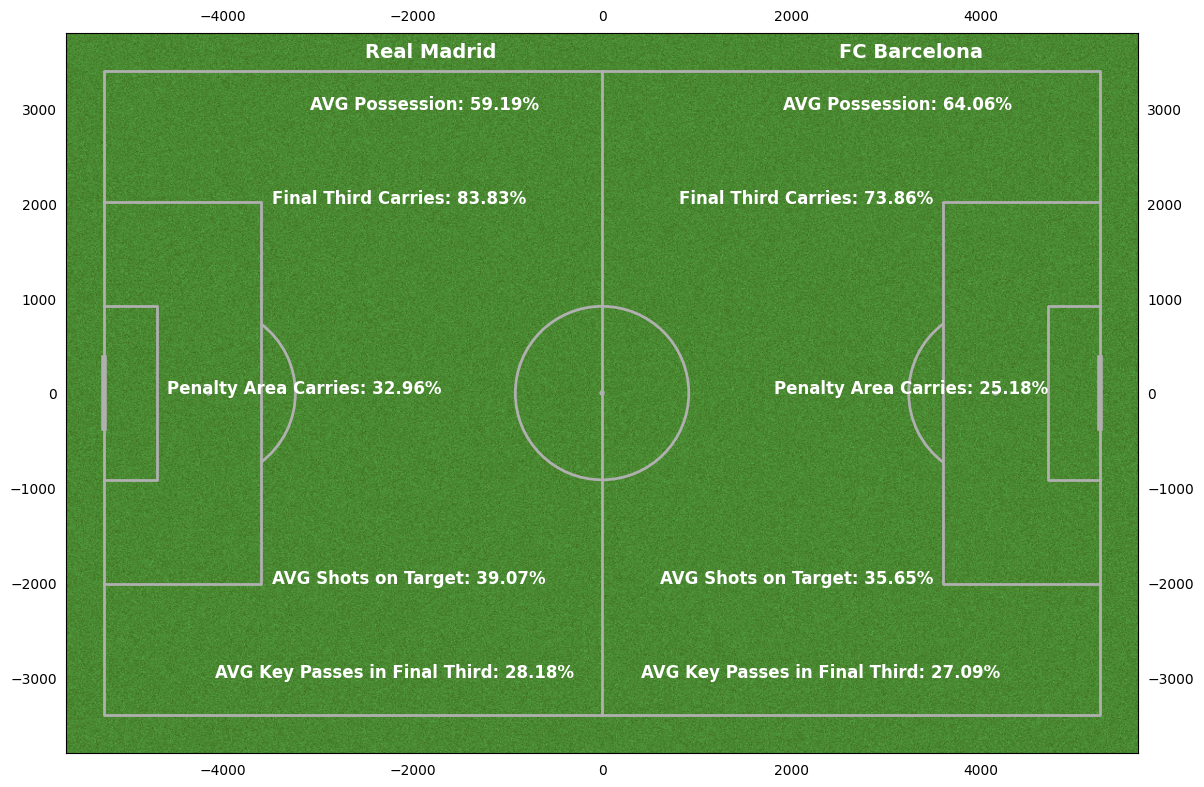

In [ ]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Create a soccer pitch
pitch = Pitch(pitch_type='tracab', pitch_color='grass',  # example plotting a tracab pitch
              pitch_length=105, pitch_width=68,
              axis=True, label=True)

# Draw the pitch
fig, ax = pitch.draw()

# Define data for FC Barcelona and Real Madrid
barcelona_data = combined_df["FC Barcelona"][["penalty_area_carries_pct", "final_third_carries_pct", "key_pass_final_third", "avg_possession", "avg_pct_shots_on_target"]]
real_madrid_data = combined_df["Real Madrid"][["penalty_area_carries_pct", "final_third_carries_pct", "key_pass_final_third", "avg_possession", "avg_pct_shots_on_target"]]

# Annotate the pitch with FC Barcelona header
ax.annotate("FC Barcelona", xy=(2500, 3400), xytext=(0, 10),
            textcoords='offset points', fontsize=14, color='white', fontweight='bold')

# Annotate the pitch with Real Madrid header
ax.annotate("Real Madrid", xy=(-2500, 3400), xytext=(0, 10),
            textcoords='offset points', fontsize=14, color='white', fontweight='bold')

# Annotate the pitch with FC Barcelona data

## Carries into the 18 yard box divided by the carries that move the ball to the opponent's goal at least 10 yards from its furthest point
ax.annotate("Penalty Area Carries: {:.2f}%".format(barcelona_data['penalty_area_carries_pct'] * 100), xy=(2400, 0), xytext=(-40, 0),
            textcoords='offset points', fontsize=12, color='white', fontweight='bold')

# Carries that enter the 1/3 of the pitch closest to the goal divided by the carries that move the ball to the opponent's goal at least 10 yards from its furthest point
ax.annotate("Final Third Carries: {:.2f}%".format(barcelona_data['final_third_carries_pct'] * 100), xy=(1400, 2000), xytext=(-40, 0),
            textcoords='offset points', fontsize=12, color='white', fontweight='bold')

# Passes that directly lead to a shot divided by passes into the final third
ax.annotate("AVG Key Passes in Final Third: {:.2f}%".format(barcelona_data['key_pass_final_third']* 100), xy=(1000, -3000), xytext=(-40, 0),
            textcoords='offset points', fontsize=12, color='white', fontweight='bold')

ax.annotate("AVG Possession: {:.2f}%".format(barcelona_data['avg_possession']), xy=(2500, 3000), xytext=(-40, 0),
            textcoords='offset points', fontsize=12, color='white', fontweight='bold')

ax.annotate("AVG Shots on Target: {:.2f}%".format(barcelona_data['avg_pct_shots_on_target']), xy=(1200, -2000), xytext=(-40, 0),
            textcoords='offset points', fontsize=12, color='white', fontweight='bold')

# Annotate the pitch with Real Madrid data

## Carries into the 18 yard box divided by the carries that move the ball to the opponent's goal at least 10 yards from its furthest point
ax.annotate("Penalty Area Carries: {:.2f}%".format(real_madrid_data['penalty_area_carries_pct'] * 100), xy=(-4000, 0), xytext=(-40, 0),
            textcoords='offset points', fontsize=12, color='white', fontweight='bold')

# Carries that enter the 1/3 of the pitch closest to the goal divided by the carries that move the ball to the opponent's goal at least 10 yards from its furthest point
ax.annotate("Final Third Carries: {:.2f}%".format(real_madrid_data['final_third_carries_pct'] * 100), xy=(-2900, 2000), xytext=(-40, 0),
            textcoords='offset points', fontsize=12, color='white', fontweight='bold')

# Passes that directly lead to a shot divided by passes into the final third
ax.annotate("AVG Key Passes in Final Third: {:.2f}%".format(real_madrid_data['key_pass_final_third']* 100), xy=(-3500, -3000), xytext=(-40, 0),
            textcoords='offset points', fontsize=12, color='white', fontweight='bold')

ax.annotate("AVG Possession: {:.2f}%".format(real_madrid_data['avg_possession']), xy=(-2500, 3000), xytext=(-40, 0),
            textcoords='offset points', fontsize=12, color='white', fontweight='bold')

ax.annotate("AVG Shots on Target: {:.2f}%".format(real_madrid_data['avg_pct_shots_on_target']), xy=(-2900, -2000), xytext=(-40, 0),
            textcoords='offset points', fontsize=12, color='white', fontweight='bold')

# Adjust the width and height
fig.set_size_inches(12, 8)

plt.show()


In [ ]:
from mplsoccer import Radar

In [ ]:
radar_df = combined_df.T

In [ ]:
# Rename columns and multiply them by 100 simultaneously
radar_df = radar_df.rename(columns={
    'final_third_pass_pct': 'Final Third Passes',
    'key_pass_final_third': 'Final Third Key Passes',
    'progressive_carries_pct': 'Progressive Carries',
    'final_third_carries_pct': 'Final Third Carries',
    'penalty_area_carries_pct': 'Penalty Area Carries',
    'avg_possession': 'Average Possession',
    'avg_successful_passes_pct': 'Average Successful Passes',
    'avg_pct_shots_on_target': 'Average Shots on Target'
})

radar_df['Final Third Passes'] *= 100
radar_df['Final Third Key Passes'] *= 100
radar_df['Progressive Carries'] *= 100
radar_df['Final Third Carries'] *= 100
radar_df['Penalty Area Carries'] *= 100


In [ ]:
radar_df.reset_index(inplace=True)
radar_df.rename(columns={'index': 'team'}, inplace=True)

In [ ]:
radar_df_barcelona = radar_df[radar_df['team'] == 'FC Barcelona']
radar_df_madrid = radar_df[radar_df['team'] == 'Real Madrid']

In [ ]:
columns_to_plot = ['Final Third Passes', 'Final Third Key Passes', 'Progressive Carries',
       'Final Third Carries', 'Penalty Area Carries', 'Average Possession'
]

radar = Radar(
    params = columns_to_plot,
    min_range=[0 for _ in columns_to_plot],
    max_range = [75 for _ in columns_to_plot]
)

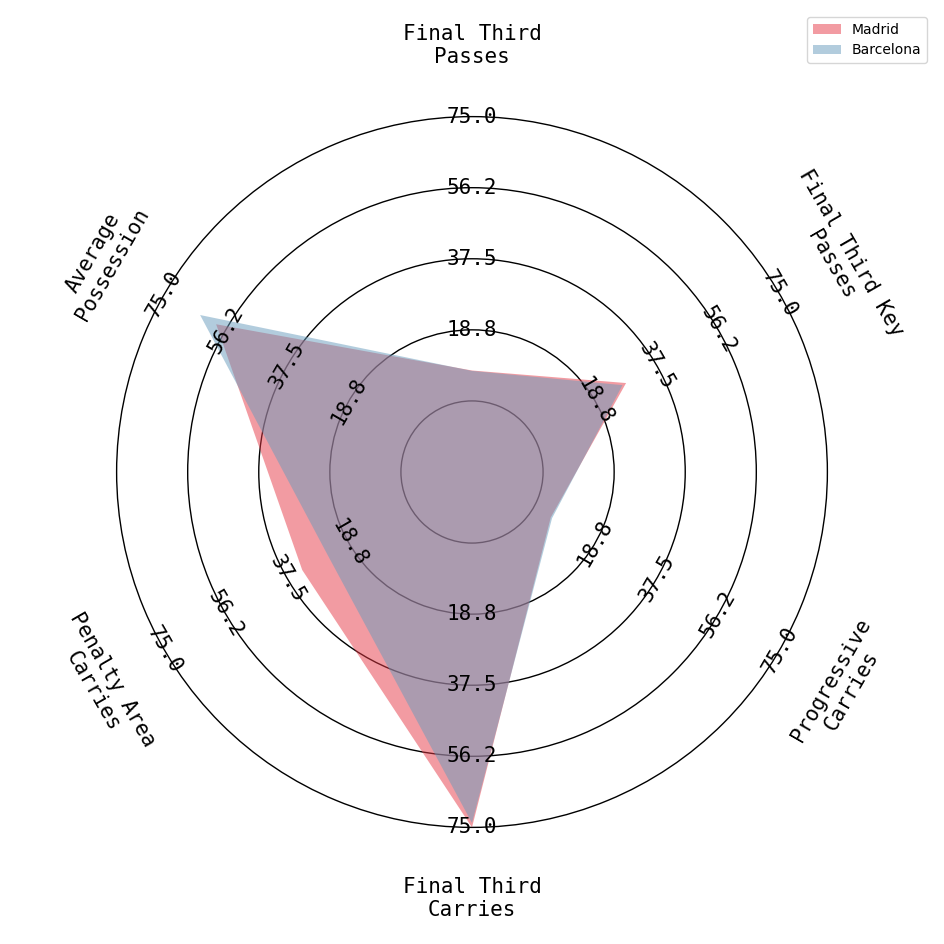

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure and axis
fig, ax = radar.setup_axis()

# Draw circles
rings_inner = radar.draw_circles(ax=ax, facecolor='white', edgecolor='black', lw=1, zorder=1)

# Combine values for Madrid and Barcelona
values_madrid = list(radar_df_madrid[columns_to_plot].values.flatten())
values_barcelona = list(radar_df_barcelona[columns_to_plot].values.flatten())

# Draw radar for Madrid
radar_output_madrid = radar.draw_radar_compare(
    ax=ax,
    values=values_madrid,
    compare_values=values_barcelona,  # Barcelona's values will be the comparison
    kwargs_radar={'facecolor': '#e63946', 'alpha': 0.5},
    kwargs_compare={'facecolor': '#669BBC', 'alpha': 0.5}
)

# Draw range labels
range_labels = radar.draw_range_labels(ax=ax, fontsize=15, fontproperties='monospace')

# Draw parameter labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15, fontproperties='monospace')

# Add legend
ax.legend(['Madrid', 'Barcelona'])

# Show the plot
plt.show()
